## **Librerías**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta

In [4]:
import sys
sys.path.append('./')
sys.path.append('../')

In [5]:
from Utils.functions import thousands_formatter, graph_histogram, adjust_decimal_format

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score, recall_score, f1_score

In [7]:
from xgboost import XGBClassifier

In [91]:
from imblearn.over_sampling import SMOTE

In [8]:
import pickle

## **Datos**

In [9]:
df_train = pd.read_csv('../Data/Raw/abt_prueba_train.csv', sep='|')

C:\Users\jmart\AppData\Local\Temp\ipykernel_9352\3399716307.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../Data/Raw/abt_prueba_train.csv', sep='|')


In [10]:
df_validation = pd.read_csv('../Data/Raw/validation1.csv', sep='|')

## **Exploración**

### **Dataset de Entrenamiento**

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179340 entries, 0 to 179339
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_CTE           179340 non-null  int64  
 1   conteo           179340 non-null  int64  
 2   EDAD             179340 non-null  int64  
 3   Salario_final    179340 non-null  object 
 4   SCORE_CLEAR      179340 non-null  int64  
 5   MANTIENE_NOM     179340 non-null  object 
 6   max_con          179340 non-null  int64  
 7   tasa_ofertada    179340 non-null  object 
 8   cliente digital  179340 non-null  object 
 9   sum_op_digital   179340 non-null  object 
 10  mean_importe     147380 non-null  object 
 11  m_consultas      147380 non-null  object 
 12  m_monetarias     147380 non-null  object 
 13  m_nomonetarias   147380 non-null  object 
 14  CROSS_SELL       174398 non-null  float64
 15  ACTIVO           174543 non-null  float64
 16  PASIVO           174543 non-null  floa

#### **Limpieza de variables**

In [12]:
df_train['tasa_ofertada'] = adjust_decimal_format(df_train['tasa_ofertada'])
df_train['sum_op_digital'] = adjust_decimal_format(df_train['sum_op_digital'])
df_train['mean_importe'] = adjust_decimal_format(df_train['mean_importe'])
df_train['m_consultas'] = adjust_decimal_format(df_train['m_consultas'])
df_train['m_monetarias'] = adjust_decimal_format(df_train['m_monetarias'])
df_train['m_nomonetarias'] = adjust_decimal_format(df_train['m_monetarias'])
df_train['tasa_contratada'] = adjust_decimal_format(df_train['tasa_contratada'])
df_train['Salario_final'] = adjust_decimal_format(df_train['Salario_final'])

In [250]:
df_train.columns

Index(['EDAD', 'Salario_final', 'SCORE_CLEAR', 'MANTIENE_NOM', 'max_con',
       'tasa_ofertada', 'cliente digital', 'sum_op_digital', 'mean_importe',
       'm_consultas', 'm_monetarias', 'm_nomonetarias', 'CROSS_SELL', 'ACTIVO',
       'PASIVO', 'cross_sell_ahor', 'alta'],
      dtype='object')

In [13]:
df_train['EDAD'] = df_train['EDAD'].apply(lambda x: int(x))

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179340 entries, 0 to 179339
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_CTE           179340 non-null  int64  
 1   conteo           179340 non-null  int64  
 2   EDAD             179340 non-null  int64  
 3   Salario_final    179340 non-null  float64
 4   SCORE_CLEAR      179340 non-null  int64  
 5   MANTIENE_NOM     179340 non-null  object 
 6   max_con          179340 non-null  int64  
 7   tasa_ofertada    179340 non-null  float64
 8   cliente digital  179340 non-null  object 
 9   sum_op_digital   179340 non-null  float64
 10  mean_importe     179340 non-null  float64
 11  m_consultas      179340 non-null  float64
 12  m_monetarias     179340 non-null  float64
 13  m_nomonetarias   179340 non-null  float64
 14  CROSS_SELL       174398 non-null  float64
 15  ACTIVO           174543 non-null  float64
 16  PASIVO           174543 non-null  floa

#### **Detalle de cada característica**

##### **Edad**

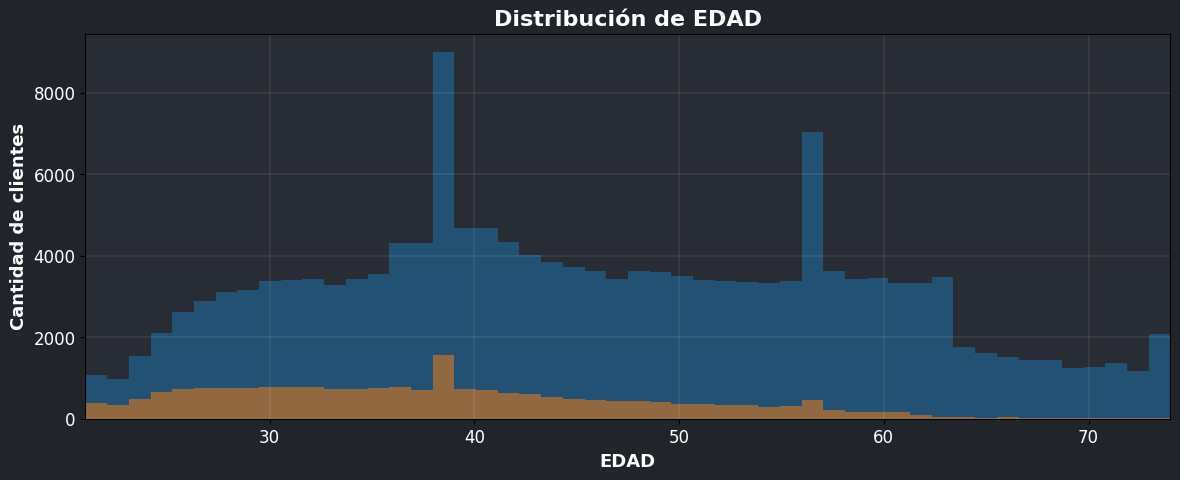

In [15]:
graph_histogram(
    df=df_train,
    column='EDAD', 
    n_bins=50
)

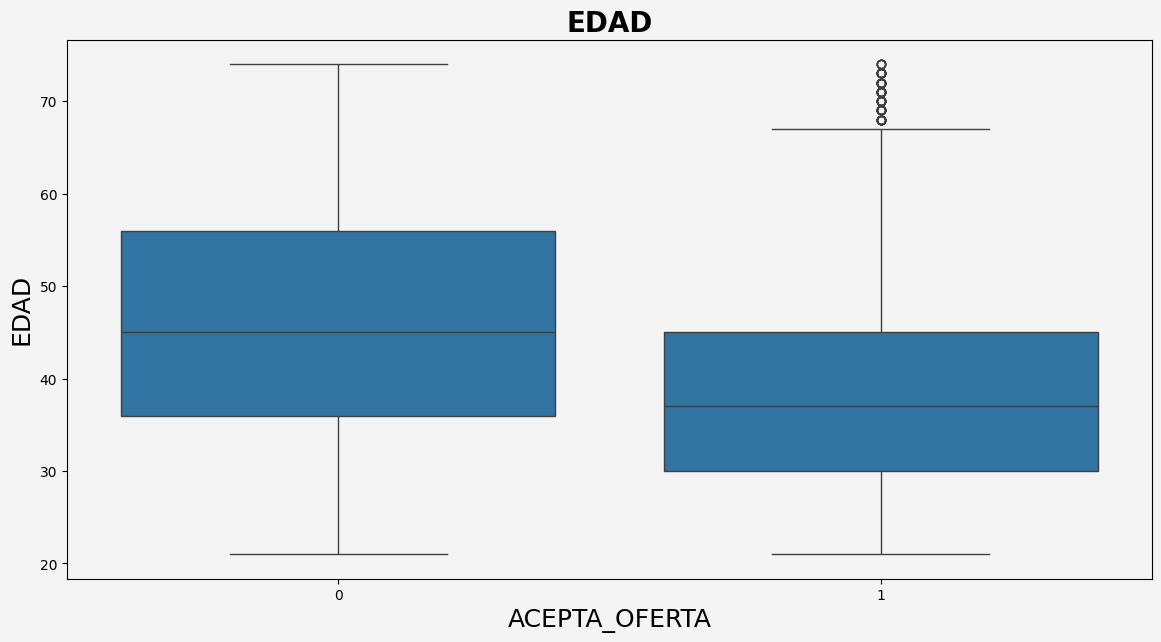

In [16]:
fig, ax = plt.subplots(figsize=(14, 7))

fig.patch.set_facecolor('#F4F4F4') 
ax.set_facecolor('#F4F4F4') 

plt.title(f'EDAD', size=20, weight=700)

sns.boxplot(
    x=df_train['alta'],
    y=df_train['EDAD'],
    # fliersize=0
)

plt.xlabel(f'ACEPTA_OFERTA', size=18, weight=300)
plt.ylabel(f'EDAD', size=18, weight=300)


plt.show()

##### **Salario Final**

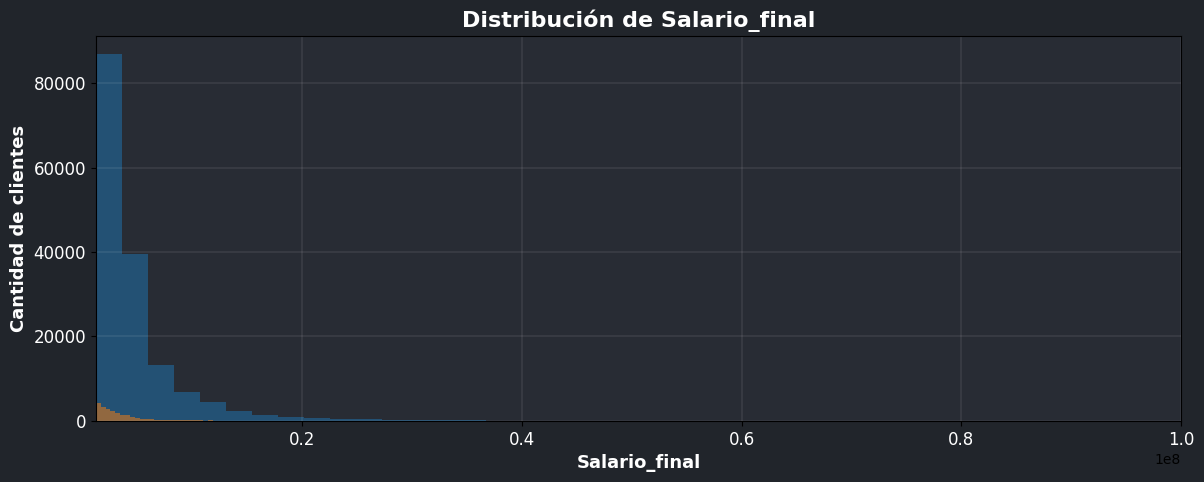

In [17]:
graph_histogram(
    df=df_train.query('Salario_final < 4_512_418_400'),
    column='Salario_final', 
    n_bins=100,
    max_value=100_000_000
)

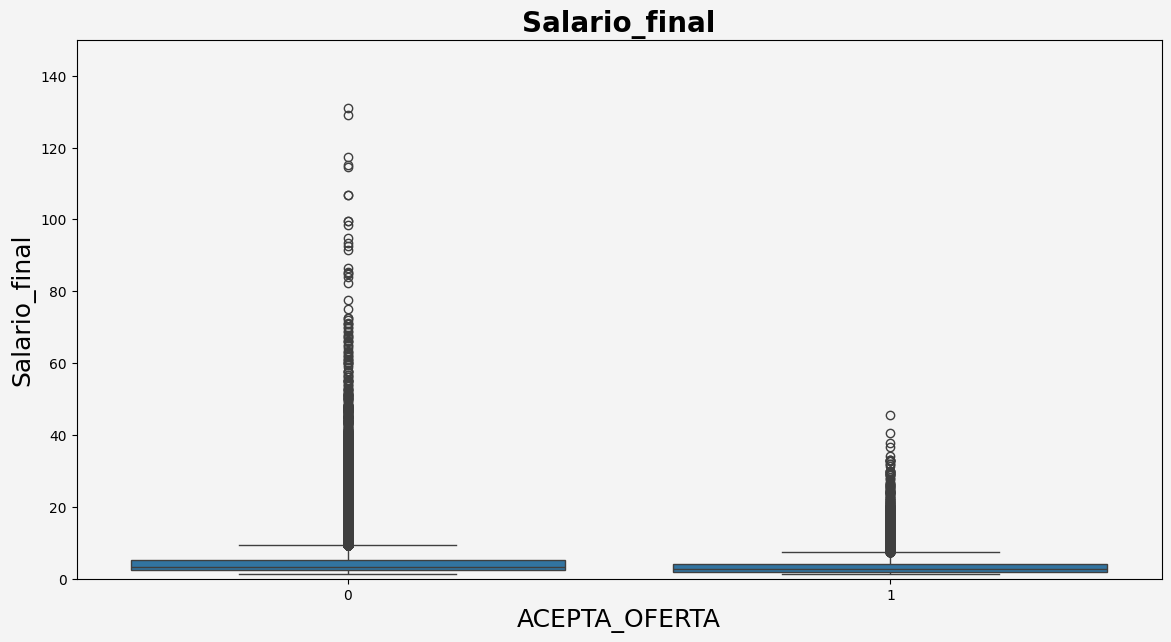

In [18]:
fig, ax = plt.subplots(figsize=(14, 7))

fig.patch.set_facecolor('#F4F4F4') 
ax.set_facecolor('#F4F4F4') 

plt.title(f'Salario_final', size=20, weight=700)

sns.boxplot(
    x=df_train.query('Salario_final < 4_512_418_400')['alta'],
    y=df_train.query('Salario_final < 4_512_418_400')['Salario_final']/1_000_000
    # fliersize=0
)

plt.xlabel(f'ACEPTA_OFERTA', size=18, weight=300)
plt.ylabel(f'Salario_final', size=18, weight=300)

plt.ylim(0, 150)

plt.show()

##### **Score**

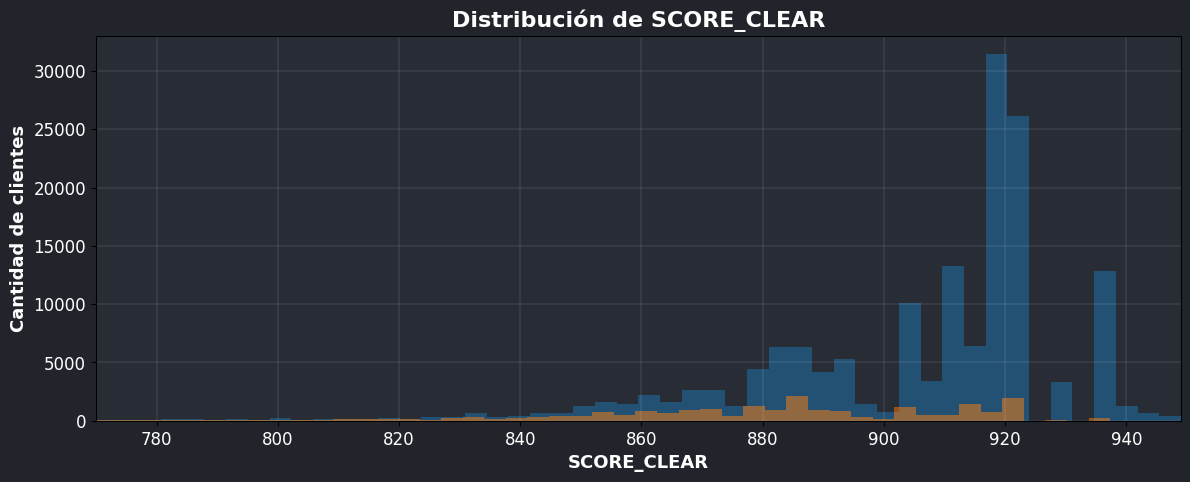

In [19]:
graph_histogram(
    df=df_train,
    column='SCORE_CLEAR', 
    n_bins=50
)

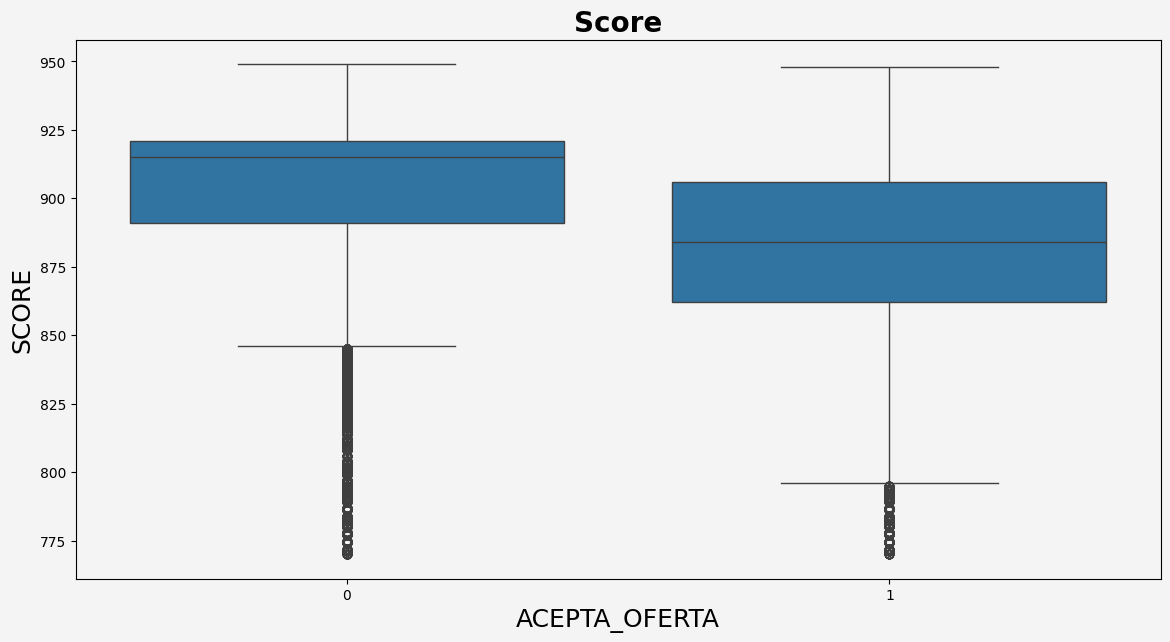

In [20]:
fig, ax = plt.subplots(figsize=(14, 7))

fig.patch.set_facecolor('#F4F4F4') 
ax.set_facecolor('#F4F4F4') 

plt.title(f'Score', size=20, weight=700)

sns.boxplot(
    x=df_train['alta'],
    y=df_train['SCORE_CLEAR'],
    # fliersize=0
)

plt.xlabel(f'ACEPTA_OFERTA', size=18, weight=300)
plt.ylabel(f'SCORE', size=18, weight=300)


plt.show()

##### **Nomina**

In [21]:
df_train.groupby(['alta', 'MANTIENE_NOM'])[['NU_CTE']].count()

NU_CTE
alta MANTIENE_NOM        
0    NO             33159
     SI            124757
1    NO              1321
     SI             20103

##### **Cupo Disponible**

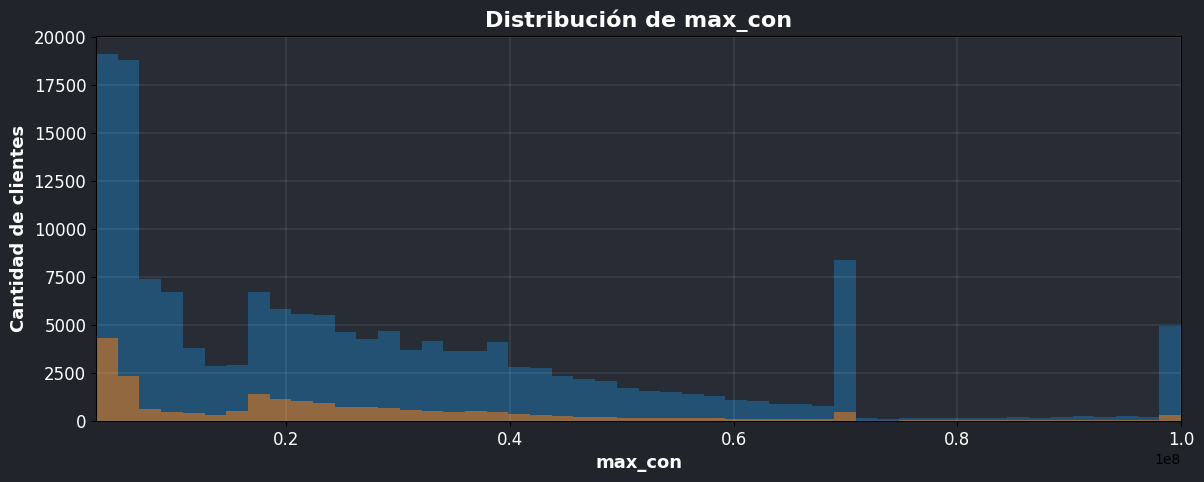

In [22]:
graph_histogram(
    df=df_train,
    column='max_con', 
    n_bins=50
)

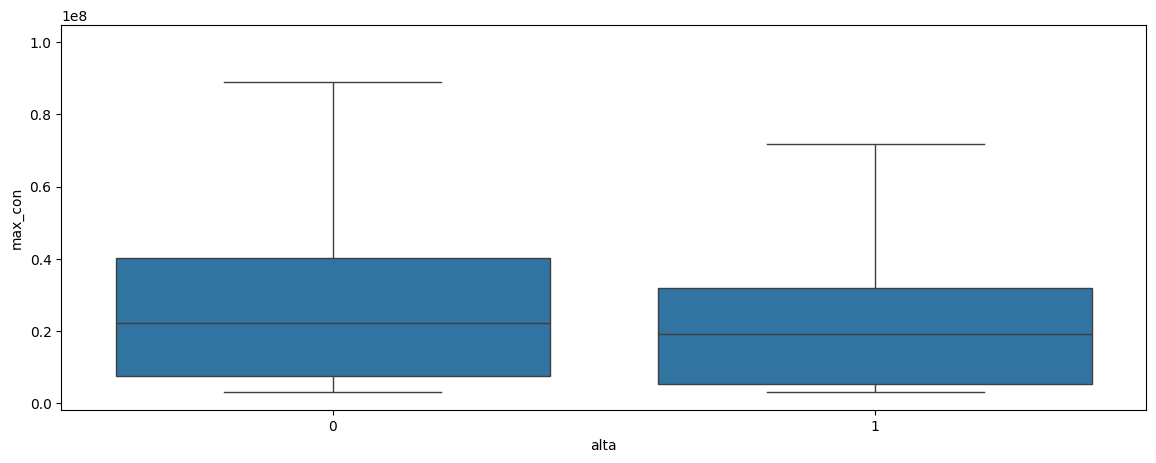

In [23]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['max_con'],
    fliersize=0
)

plt.show()

##### **Tasa ofertada**

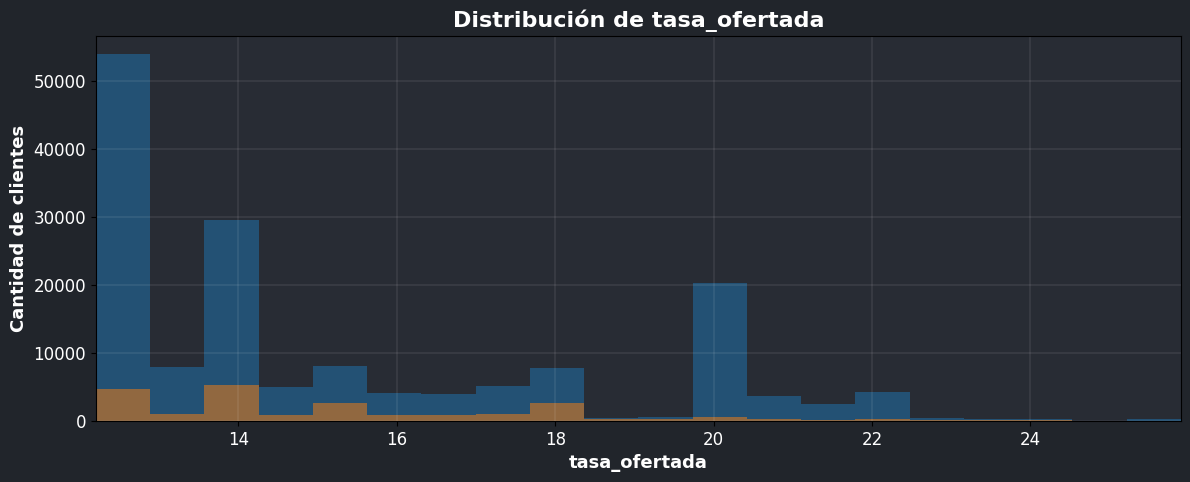

In [24]:
graph_histogram(
    df=df_train,
    column='tasa_ofertada', 
    n_bins=20
)

In [25]:
df_train.query('alta == 1')['tasa_ofertada'].describe()

count    21424.000000
mean        15.136011
std          2.617289
min         12.200000
25%         13.500000
50%         14.000000
75%         17.100000
max         25.900000
Name: tasa_ofertada, dtype: float64

In [26]:
df_train.query('alta == 0')['tasa_ofertada'].describe()

count    157916.000000
mean         15.234914
std           3.207036
min          12.200000
25%          12.200000
50%          13.800000
75%          17.700000
max          25.900000
Name: tasa_ofertada, dtype: float64

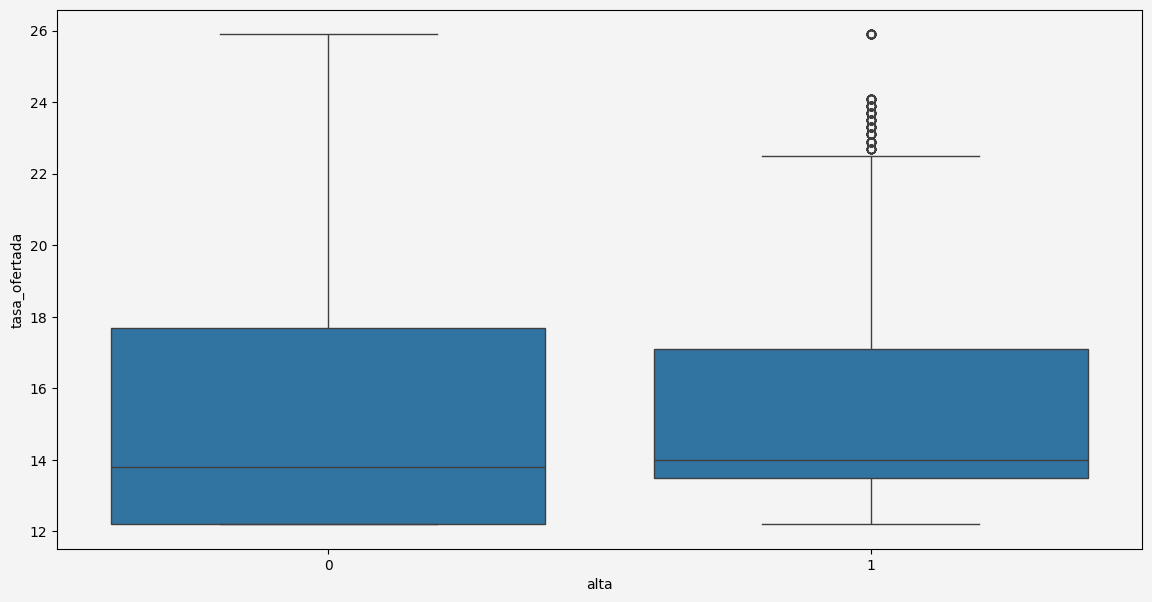

In [27]:
fig, ax = plt.subplots(figsize=(14, 7))

fig.patch.set_facecolor('#F4F4F4') 
ax.set_facecolor('#F4F4F4') 


sns.boxplot(
    x=df_train['alta'],
    y=df_train['tasa_ofertada'],
    # fliersize=0
)

plt.show()

##### **Cliente digital**

In [28]:
pd.DataFrame(
    round(df_train['cliente digital'].value_counts(normalize=True)*100, 2)
)

,proportion
cliente digital,
si,81.57
no,18.43


In [29]:
df_train.groupby(['alta', 'cliente digital'])[['NU_CTE']].count()

NU_CTE
alta cliente digital        
0    no                31947
     si               125969
1    no                 1097
     si                20327

##### **Suma de operaciones digitales**

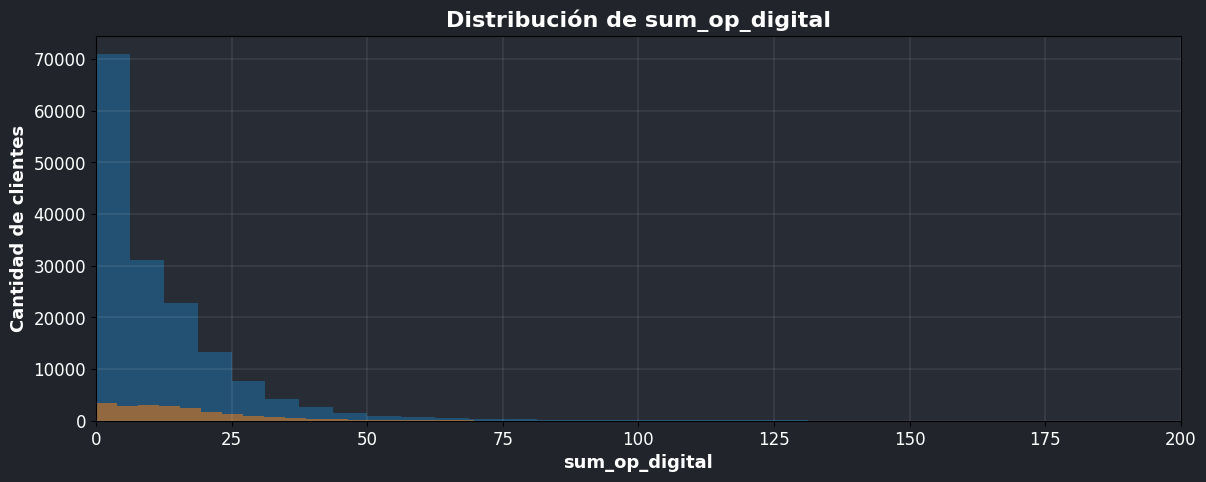

In [30]:
graph_histogram(
    df=df_train,
    column='sum_op_digital', 
    n_bins=120,
    max_value=200
)

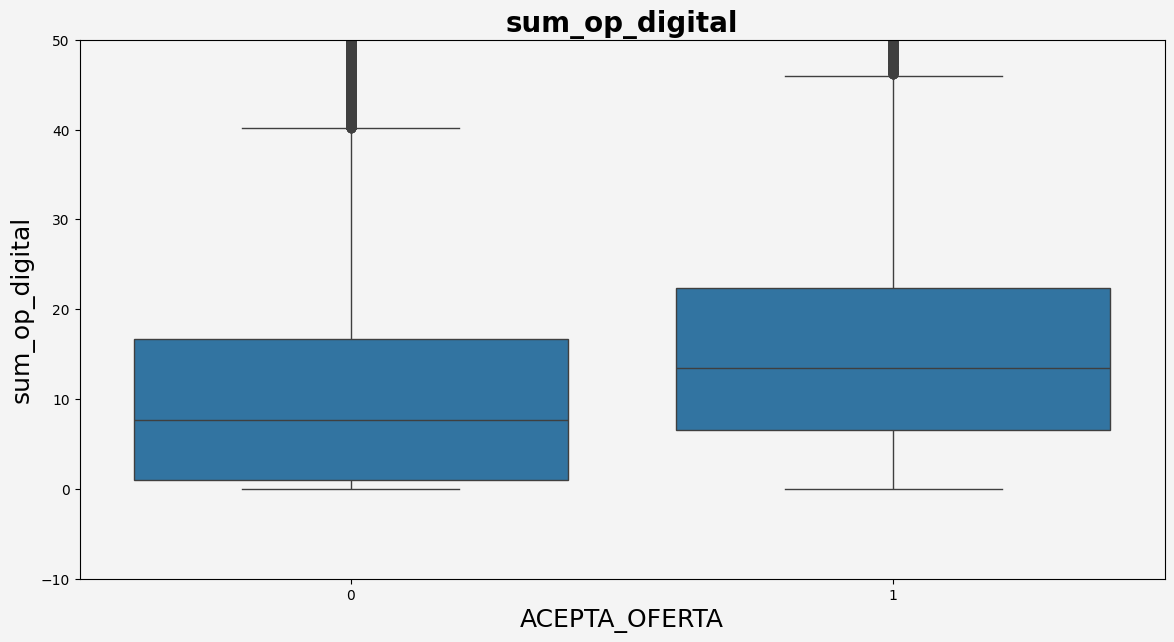

In [31]:
fig, ax = plt.subplots(figsize=(14, 7))

fig.patch.set_facecolor('#F4F4F4') 
ax.set_facecolor('#F4F4F4') 

plt.title(f'sum_op_digital', size=20, weight=700)

sns.boxplot(
    x=df_train['alta'],
    y=df_train['sum_op_digital'],
    # fliersize=0
)

plt.xlabel(f'ACEPTA_OFERTA', size=18, weight=300)
plt.ylabel(f'sum_op_digital', size=18, weight=300)

plt.ylim(-10, 50)

plt.show()

##### **Importe medio (3 meses)**

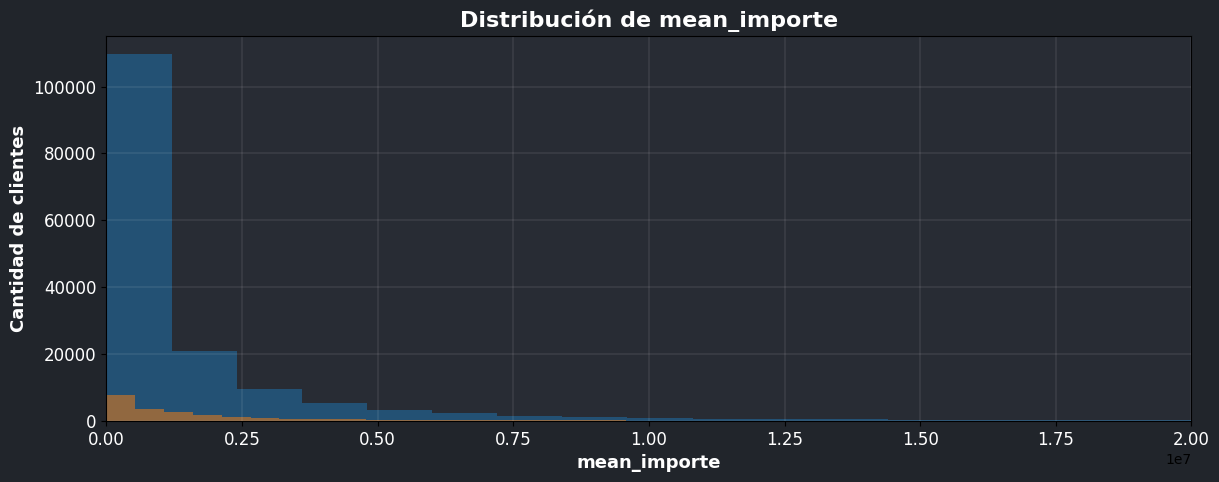

In [32]:
graph_histogram(
    df=df_train,
    column='mean_importe', 
    n_bins=200,
    max_value=20_000_000
)

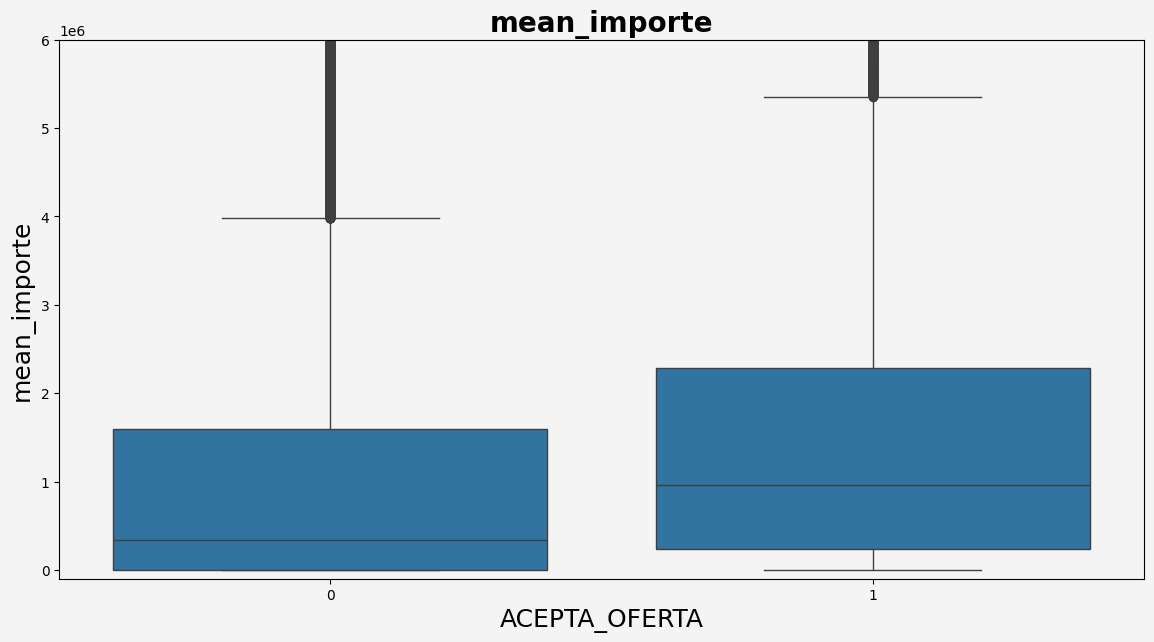

In [33]:
fig, ax = plt.subplots(figsize=(14, 7))

fig.patch.set_facecolor('#F4F4F4') 
ax.set_facecolor('#F4F4F4') 

plt.title(f'mean_importe', size=20, weight=700)

sns.boxplot(
    x=df_train['alta'],
    y=df_train['mean_importe'],
    # fliersize=0
)

plt.xlabel(f'ACEPTA_OFERTA', size=18, weight=300)
plt.ylabel(f'mean_importe', size=18, weight=300)

plt.ylim(-100_000, 6_000_000)

plt.show()


##### **Cantidad de consultas (3 meses)**

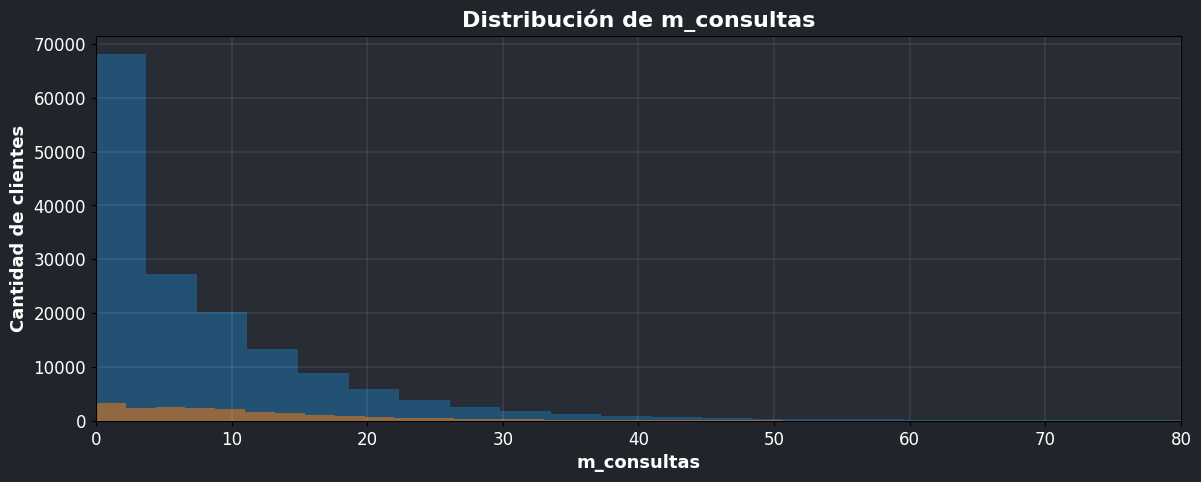

In [34]:
graph_histogram(
    df=df_train,
    column='m_consultas', 
    n_bins=200,
    max_value=80
)

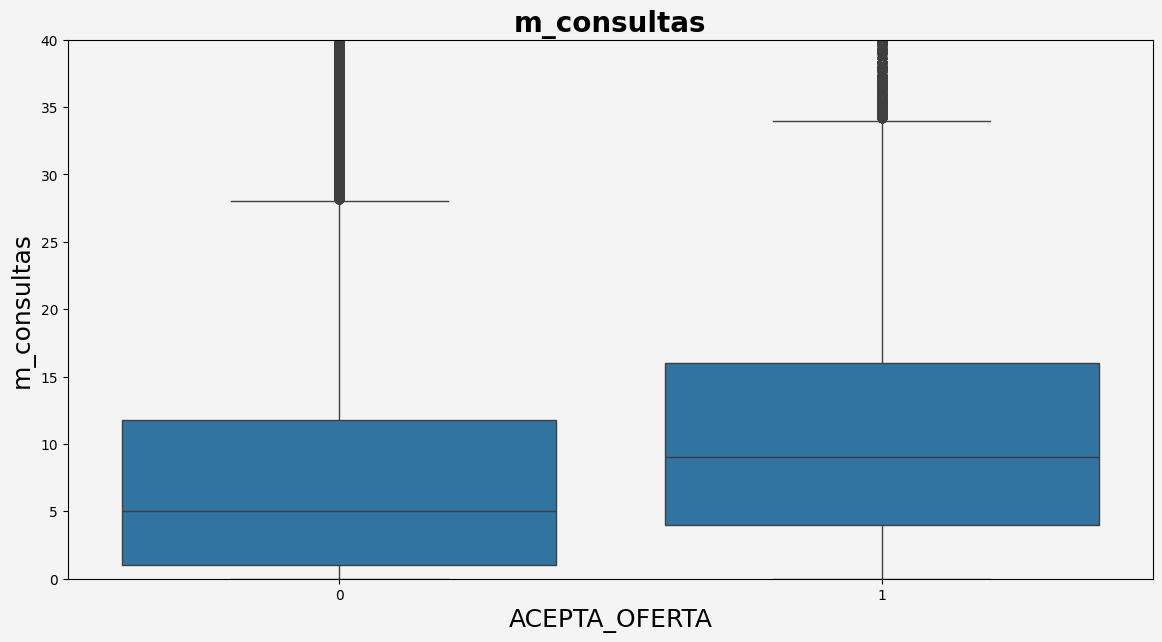

In [35]:
fig, ax = plt.subplots(figsize=(14, 7))

fig.patch.set_facecolor('#F4F4F4') 
ax.set_facecolor('#F4F4F4') 

plt.title(f'm_consultas', size=20, weight=700)

sns.boxplot(
    x=df_train['alta'],
    y=df_train['m_consultas'],
    # fliersize=0
)

plt.xlabel(f'ACEPTA_OFERTA', size=18, weight=300)
plt.ylabel(f'm_consultas', size=18, weight=300)

plt.ylim(0, 40)

plt.show()


##### **Cantidad de operaciones monetarias (3 meses)**

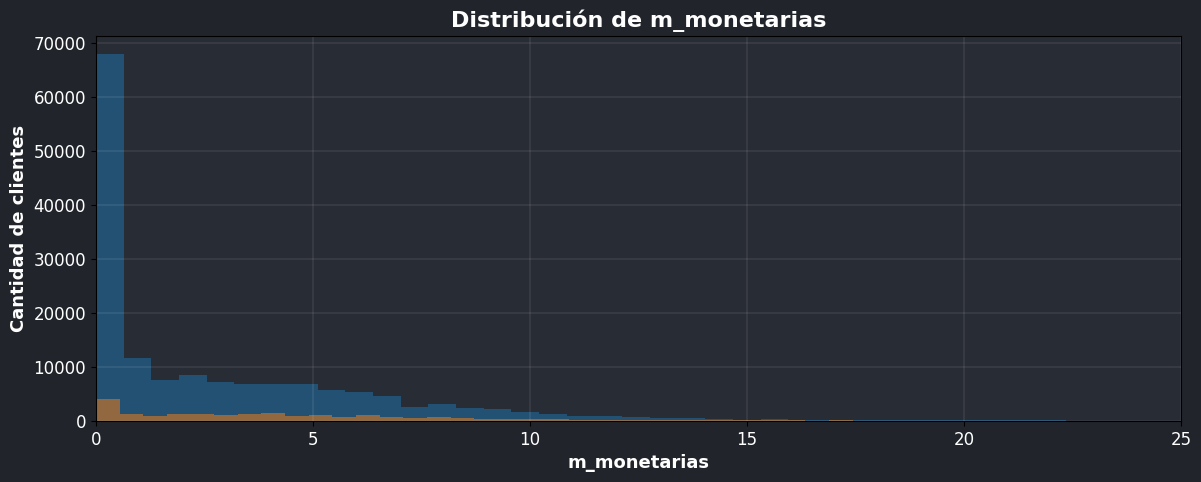

In [36]:
graph_histogram(
    df=df_train,
    column='m_monetarias', 
    n_bins=200,
    max_value=25
)

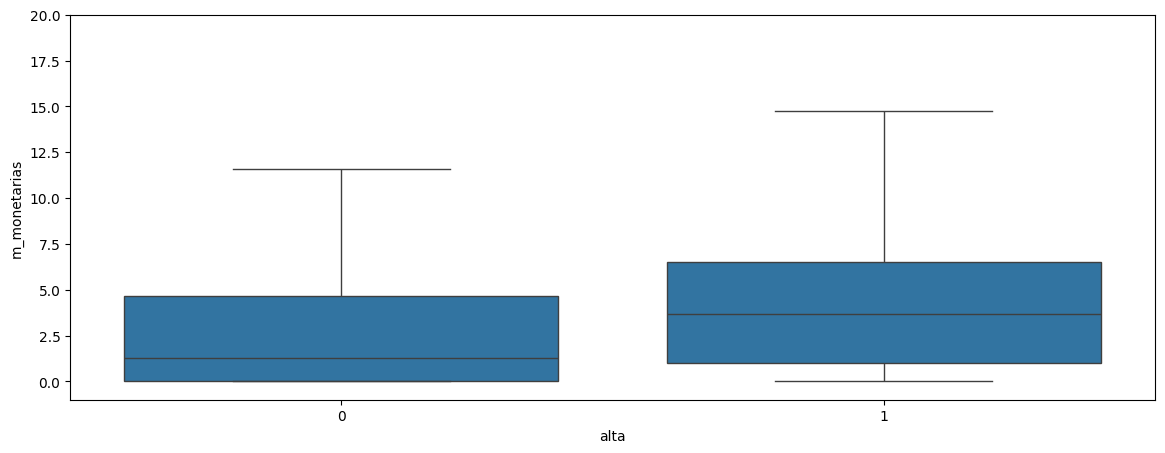

In [37]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['m_monetarias'],
    fliersize=0
)

plt.ylim(-1, 20)

plt.show()

##### **Cantidad de operaciones no monetarias (3 meses)**

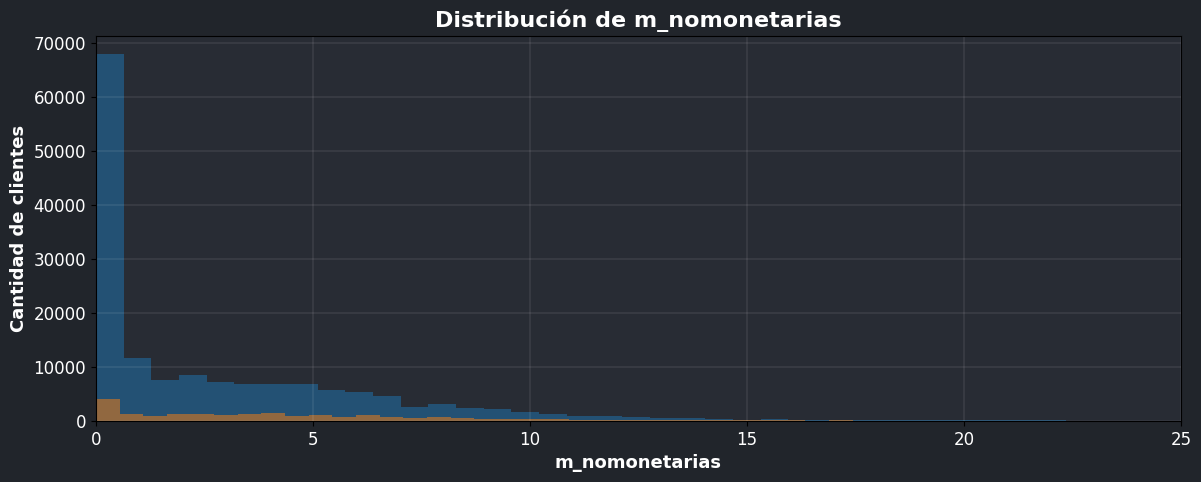

In [38]:
graph_histogram(
    df=df_train,
    column='m_nomonetarias', 
    n_bins=200,
    max_value=25
)

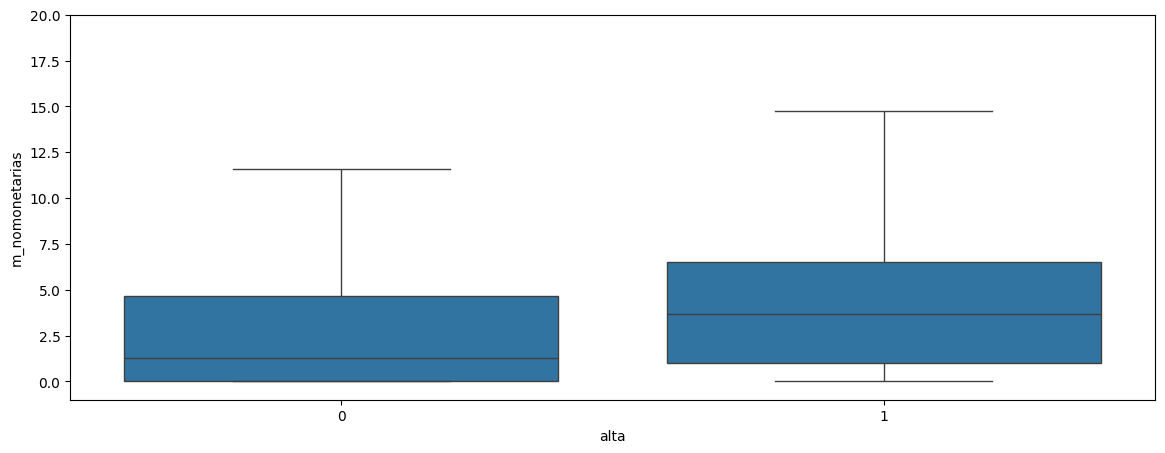

In [39]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['m_nomonetarias'],
    fliersize=0
)

plt.ylim(-1, 20)

plt.show()

##### **Total de venta cruzada**

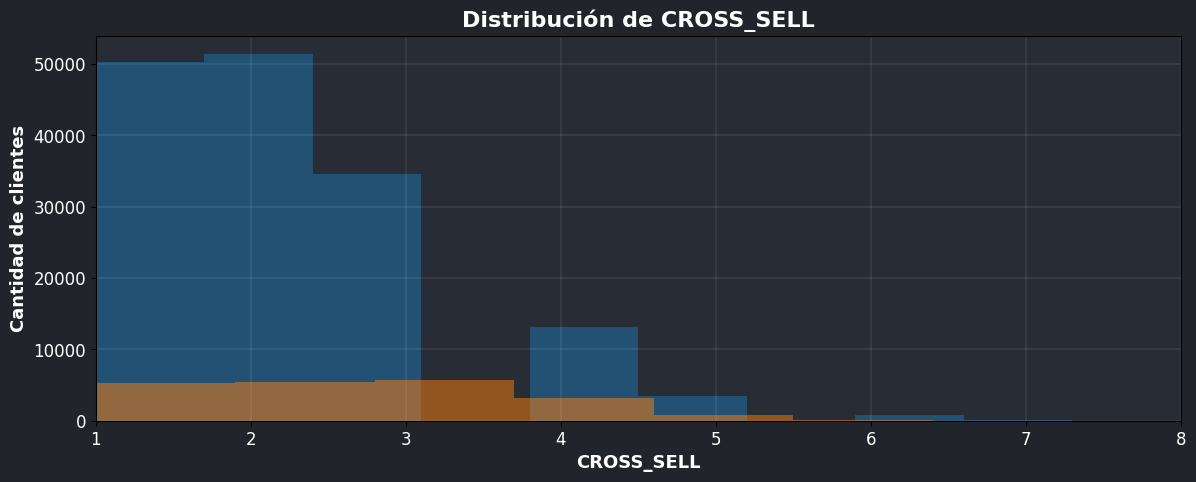

In [40]:
graph_histogram(
    df=df_train,
    column='CROSS_SELL', 
    n_bins=10,
    max_value=8
)

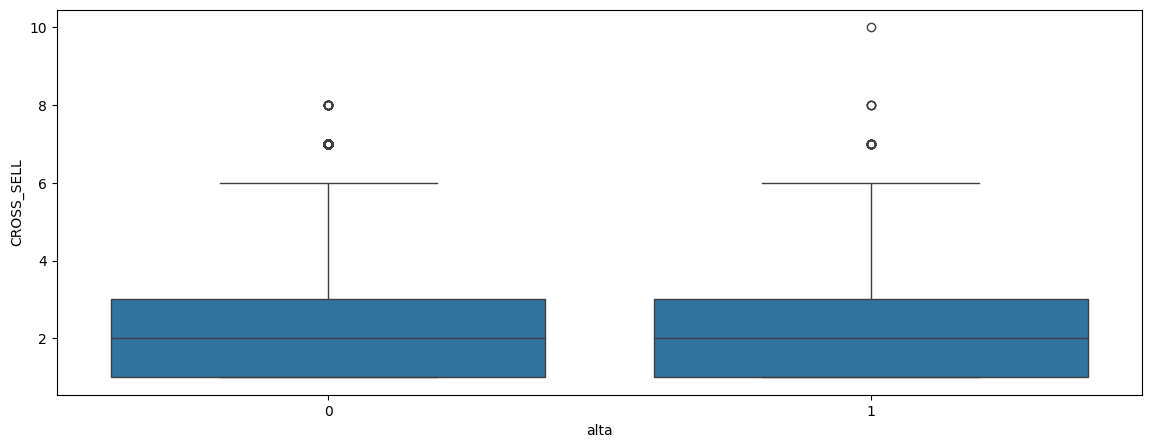

In [41]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['CROSS_SELL'],
    # fliersize=0
)

# plt.ylim(-1, 20)

plt.show()

##### **Activo**

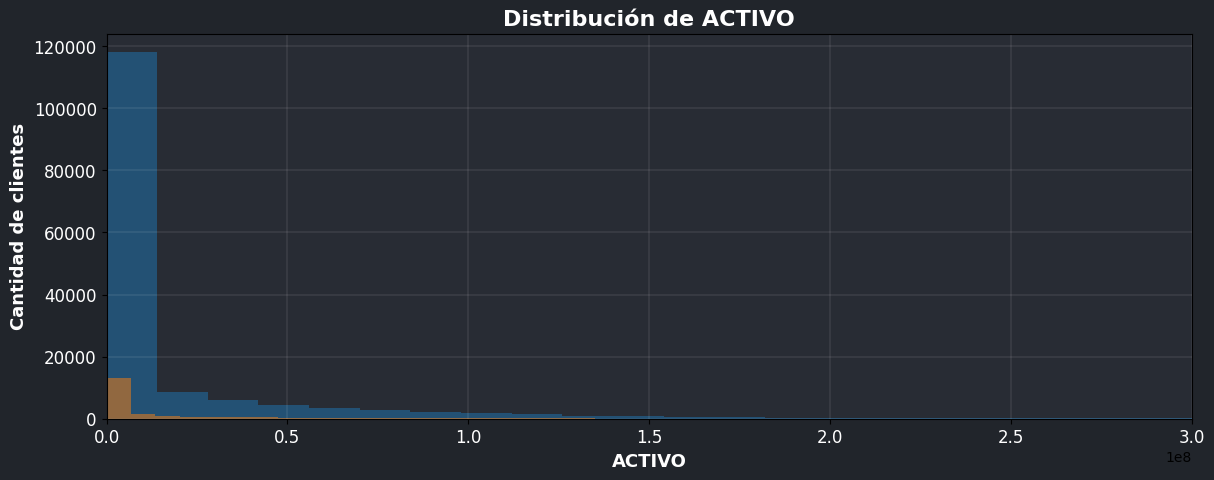

In [42]:
graph_histogram(
    df=df_train,
    column='ACTIVO', 
    n_bins=100,
    max_value=300_000_000
)

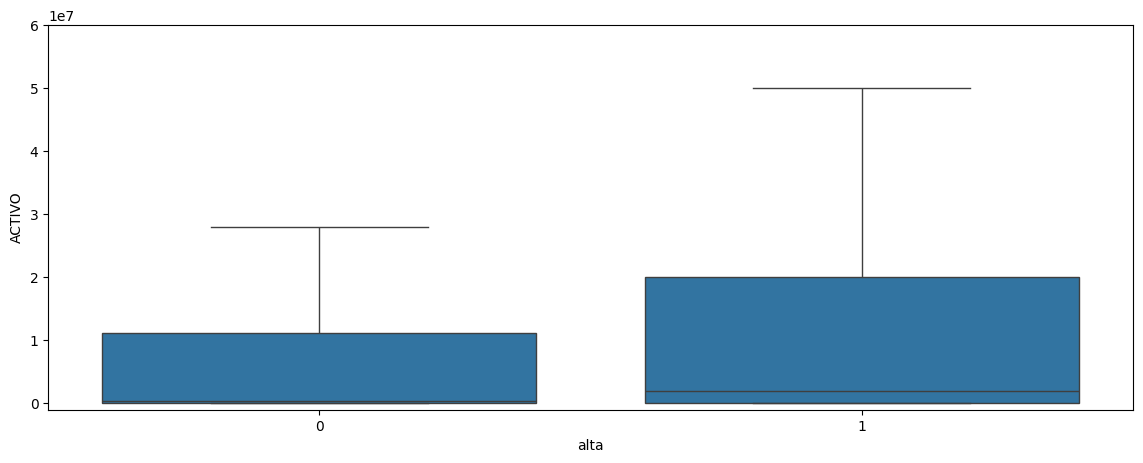

In [43]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['ACTIVO'],
    fliersize=0
)

plt.ylim(-1_000_000, 60_000_000)

plt.show()

##### **Pasivo**

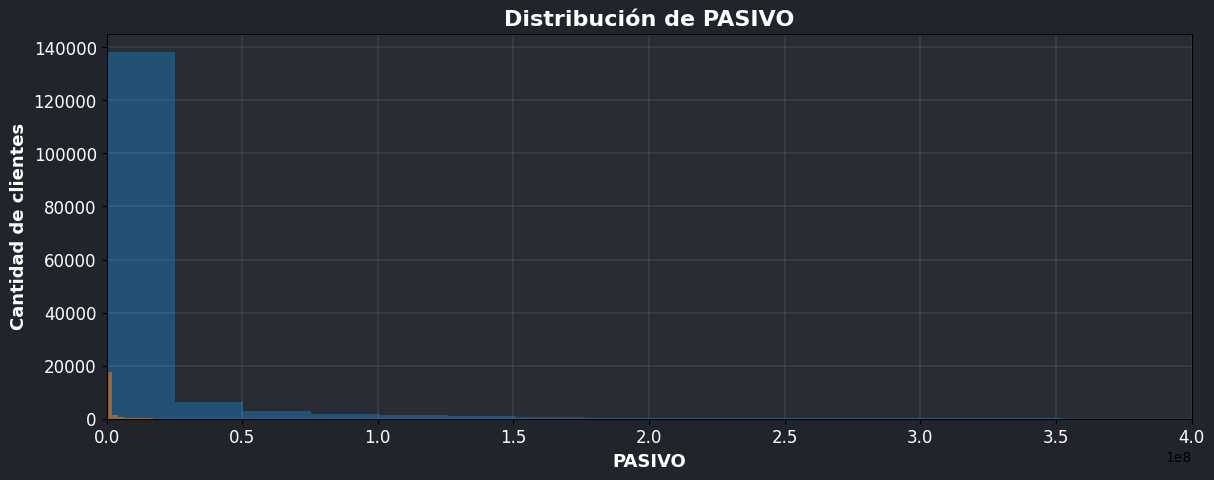

In [44]:
graph_histogram(
    df=df_train,
    column='PASIVO', 
    n_bins=200,
    max_value=400_000_000
)

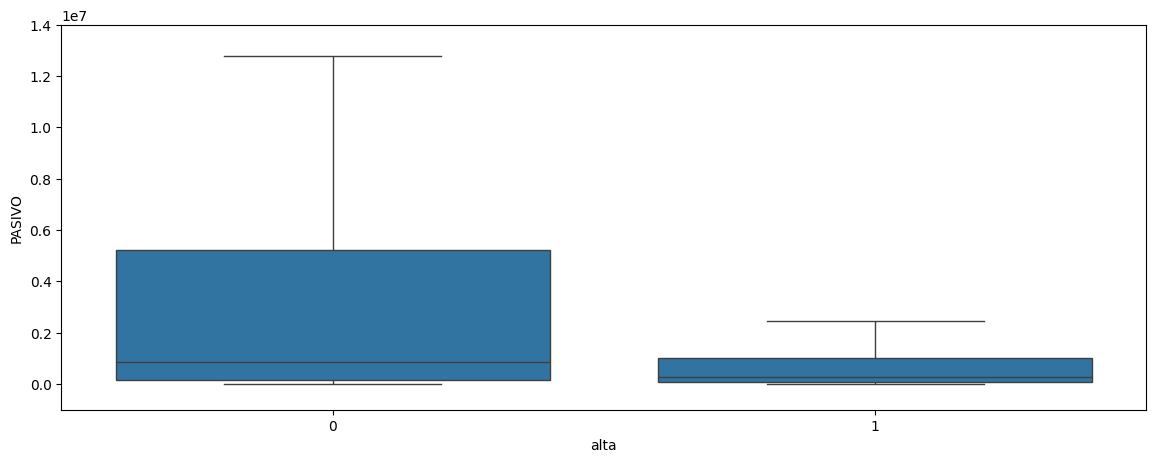

In [45]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['PASIVO'],
    fliersize=0
)

plt.ylim(-1_000_000, 14_000_000)

plt.show()

##### **Venta cruzada (Excluyendo cuentas de ahorro)**

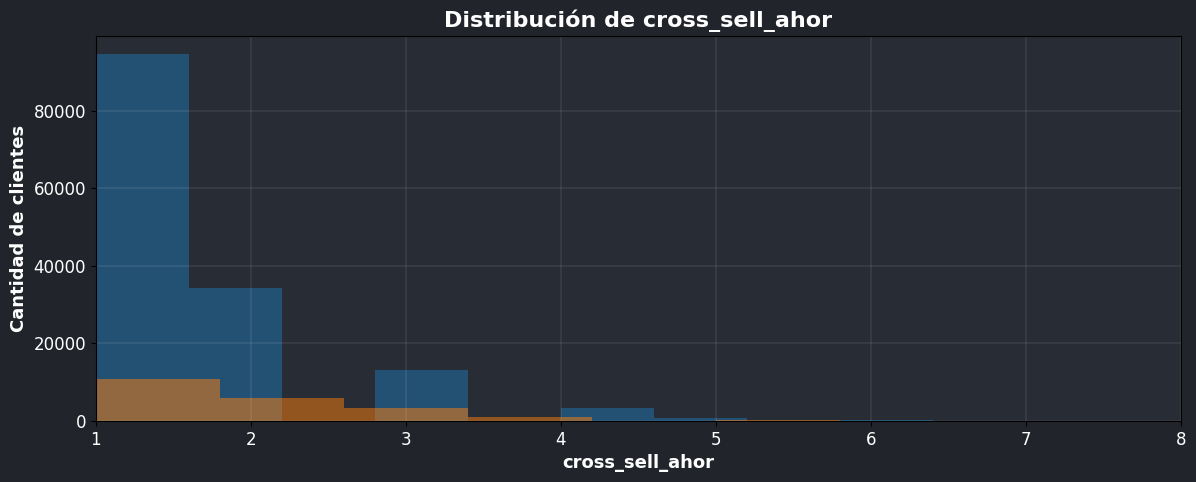

In [46]:
graph_histogram(
    df=df_train,
    column='cross_sell_ahor', 
    n_bins=10,
    max_value=8
)

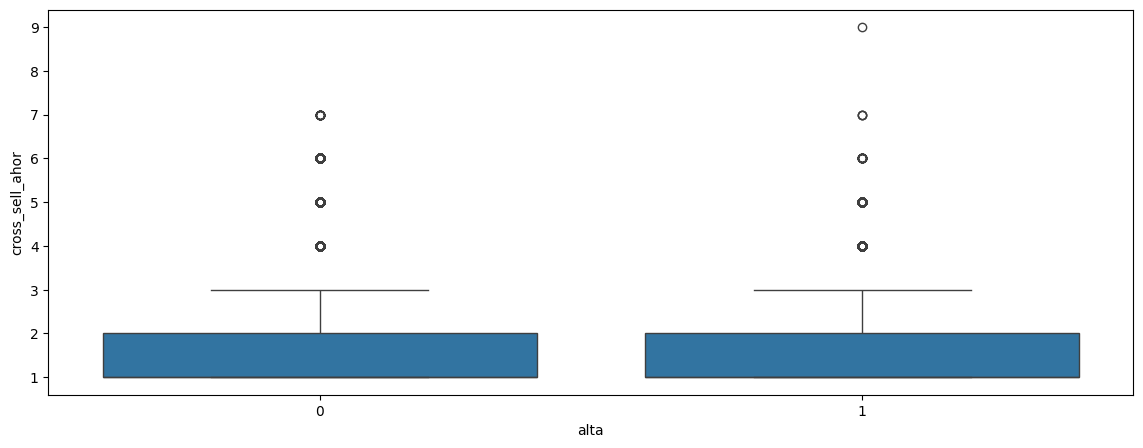

In [47]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['cross_sell_ahor'],
    # fliersize=0
)

# plt.ylim(-1_000_000, 14_000_000)

plt.show()

##### **Aceptados vs No Aceptados**

In [48]:
pd.DataFrame(
    round(df_train['alta'].value_counts(normalize=True)*100, 2)
)

,proportion
alta,
0,88.05
1,11.95


##### **Diferencias entre tasa contratada y ofertada**

In [49]:
df_train['Diferencia_Tasas'] = df_train['tasa_contratada'] - df_train['tasa_ofertada']

In [50]:
df_train.query('alta == 1')[['tasa_contratada', 'tasa_ofertada', 'Diferencia_Tasas']]

,tasa_contratada,tasa_ofertada,Diferencia_Tasas
1,14.8,13.8,1.0
3,11.7,12.2,-0.5
15,14.6,14.6,0.0
20,15.6,15.6,0.0
26,14.6,14.6,0.0
...,...,...,...
179313,10.7,12.2,-1.5
179314,12.2,12.2,0.0
179324,16.5,16.5,0.0
179327,14.8,13.8,1.0


In [51]:
len(df_train.query('alta == 1 & Diferencia_Tasas == 0')) / len(df_train.query('alta == 1') ) * 100

89.12434652725915

In [52]:
len(df_train.query('alta == 1 & Diferencia_Tasas > 0')) / len(df_train.query('alta == 1') ) * 100

3.8741598207617627

In [53]:
len(df_train.query('alta == 1 & Diferencia_Tasas < 0')) / len(df_train.query('alta == 1') ) * 100

7.001493651979089

In [54]:
df_train.query('alta == 1').value_counts('Diferencia_Tasas')

Diferencia_Tasas
 0.0     19094
 1.0       364
-3.3       288
 2.6       229
-0.2       213
         ...  
 0.4         1
-9.5         1
-10.0        1
-6.5         1
-20.1        1
Name: count, Length: 143, dtype: int64

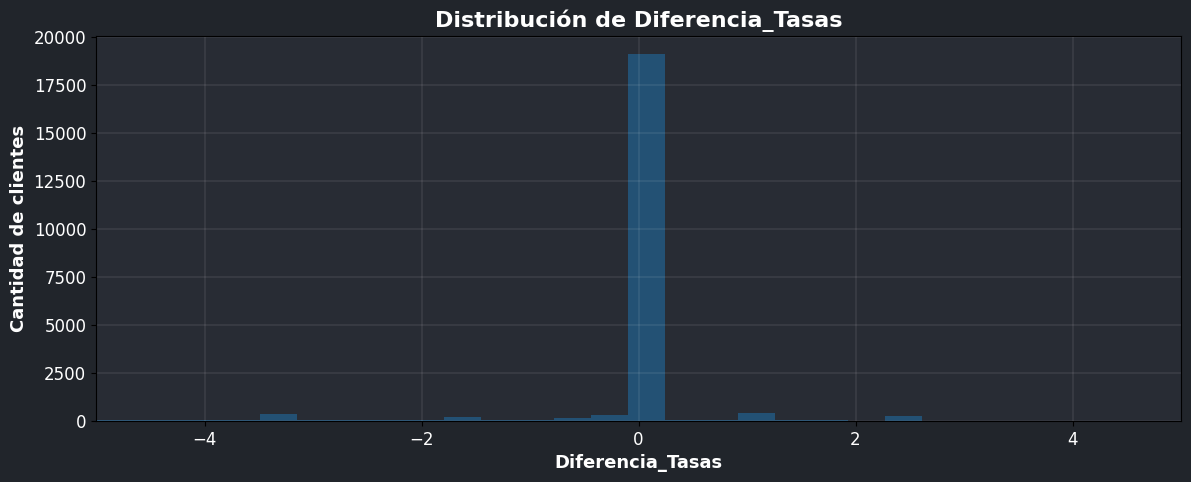

In [55]:
graph_histogram(
    df=df_train.query('alta == 1'),
    column='Diferencia_Tasas', 
    n_bins=100,
    min_value=-5,
    max_value=5
)

## **Modelo**

### **Preparación de los datos**

In [56]:
df_train.columns

Index(['NU_CTE', 'conteo', 'EDAD', 'Salario_final', 'SCORE_CLEAR',
       'MANTIENE_NOM', 'max_con', 'tasa_ofertada', 'cliente digital',
       'sum_op_digital', 'mean_importe', 'm_consultas', 'm_monetarias',
       'm_nomonetarias', 'CROSS_SELL', 'ACTIVO', 'PASIVO', 'cross_sell_ahor',
       'tasa_contratada', 'alta', 'Diferencia_Tasas'],
      dtype='object')

In [57]:
df_models = df_train[[
    'EDAD', 'Salario_final', 'SCORE_CLEAR', 'MANTIENE_NOM', 'max_con', 'tasa_ofertada', 'cliente digital',
    'sum_op_digital', 'mean_importe', 'm_consultas', 'm_monetarias', 'm_nomonetarias', 'CROSS_SELL', 'ACTIVO', 
    'PASIVO', 'cross_sell_ahor', 'alta'
]].copy()

In [58]:
X = df_models.drop('alta', axis=1)
y = df_models[['alta']]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

In [62]:
categorical_features = ['MANTIENE_NOM', 'cliente digital']

categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False,
        drop='first'
    ))
])

In [63]:
# Variables numericas 
numerical_features = ['Salario_final', 'max_con', 'mean_importe','ACTIVO', 'PASIVO']

numerical_transformer = Pipeline(steps=[
    ('standard_scaler', StandardScaler()),
])

In [64]:
# Combinamos nuestros transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, categorical_features),
        ('numerical_transformer', numerical_transformer, numerical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=True
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical_transformer',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MANTIENE_NOM', 'cliente digital']),
                                ('numerical_transformer',
                                 Pipeline(steps=[('standard_scaler',
                                                  StandardScaler())]),
                                 ['Salario_final', 'max_con', 'mean_importe',
                                  'ACTIVO', 'PASIVO'])])

In [68]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical_transformer',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MANTIENE_NOM', 'cliente digital']),
                                ('numerical_transformer',
                                 Pipeline(steps=[('standard_scaler',
                                                  StandardScaler())]),
                                 ['Salario_final', 'max_con', 'mean_importe',
                                  'ACTIVO', 'PASIVO'])])

In [69]:
pickle.dump(preprocessor, open("../Models/preprocessor.pkl", "wb"))

In [70]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#### **Random Forest sin balanceo**

In [73]:
# Inicializamos el modelo
model_rf = RandomForestClassifier()

In [251]:
# Entrenamos el modelo con la data transformada
model_rf.fit(X_train_transformed, y_train)

c:\Users\jmart\Documents\Proyectos\Data_Science\Proyectos\prueba_bbva\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [252]:
# Hacemos la predicción categorica y de probabilidad para nuestra data de test
y_pred = model_rf.predict(X_test_transformed)
y_probs = model_rf.predict_proba(X_test_transformed)[:, 1]

In [253]:
# Calculamos las primeras métricas de nuestro modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     47294
           1       0.53      0.10      0.17      6508

    accuracy                           0.88     53802
   macro avg       0.71      0.54      0.55     53802
weighted avg       0.85      0.88      0.84     53802

Accuracy: 0.8804505408720865


In [254]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

f1_list = []

# Calcular las métricas para cada umbral
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_list.append(f1)
    print(f"Threshold: {threshold:.2f} - f1: {f1:.2f}")

Threshold: 0.10 - f1: 0.36
Threshold: 0.20 - f1: 0.42
Threshold: 0.30 - f1: 0.41
Threshold: 0.40 - f1: 0.32
Threshold: 0.50 - f1: 0.19
Threshold: 0.60 - f1: 0.06
Threshold: 0.70 - f1: 0.01


In [255]:
# Encontrar el umbral que maximiza el recall
best_threshold = 0.3

# Usar el mejor umbral para hacer predicciones
y_pred_best = (y_probs >= best_threshold).astype(int)

In [256]:
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Accuracy:", accuracy_score(y_test, y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     47294
           1       0.38      0.43      0.41      6508

    accuracy                           0.85     53802
   macro avg       0.65      0.67      0.66     53802
weighted avg       0.86      0.85      0.85     53802

Accuracy: 0.8469387755102041


<Axes: >

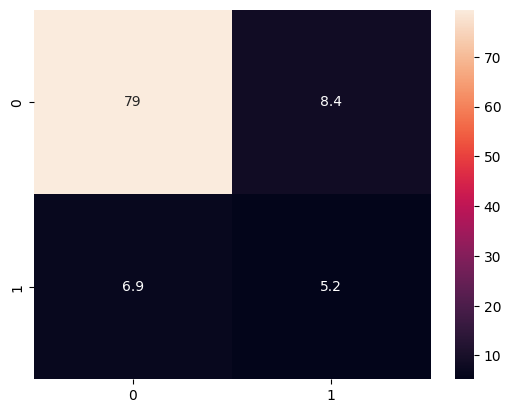

In [257]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred_best, y_true=y_test)/len(y_test)*100,
    annot=True
)

In [258]:
df_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_*100
})

# Ordenar el DataFrame por importancia de mayor a menor
df_importances = df_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
df_importances

,Feature,Importance
0,mean_importe,13.071574
1,cliente digital,11.482794
2,SCORE_CLEAR,9.323825
3,max_con,8.243447
4,MANTIENE_NOM,8.205170
5,sum_op_digital,7.614383
6,m_monetarias,7.318138
7,tasa_ofertada,7.274407
8,m_nomonetarias,7.068940
9,ACTIVO,5.593444


In [83]:
pickle.dump(model_rf, open("../Models/model_rf.pkl", "wb"))

#### **Random Forest con balanceo**

In [92]:
smote = SMOTE(random_state=13)

In [100]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [101]:
# Inicializamos el modelo
model_rf_bal = RandomForestClassifier()

In [241]:
# Entrenamos el modelo con la data transformada
model_rf_bal.fit(X_train_resampled, y_train_resampled)

c:\Users\jmart\Documents\Proyectos\Data_Science\Proyectos\prueba_bbva\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [242]:
# Hacemos la predicción categorica y de probabilidad para nuestra data de test
y_pred = model_rf_bal.predict(X_test_transformed)
y_probs = model_rf_bal.predict_proba(X_test_transformed)[:, 1]

In [243]:
# Calculamos las primeras métricas de nuestro modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     47294
           1       0.40      0.29      0.34      6508

    accuracy                           0.86     53802
   macro avg       0.65      0.62      0.63     53802
weighted avg       0.84      0.86      0.85     53802

Accuracy: 0.861733764544069


In [244]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

f1_list = []

# Calcular las métricas para cada umbral
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_list.append(f1)
    print(f"Threshold: {threshold:.2f} - f1: {f1:.2f}")

Threshold: 0.10 - f1: 0.32
Threshold: 0.20 - f1: 0.38
Threshold: 0.30 - f1: 0.41
Threshold: 0.40 - f1: 0.39
Threshold: 0.50 - f1: 0.35
Threshold: 0.60 - f1: 0.25
Threshold: 0.70 - f1: 0.13


In [245]:
# Encontrar el umbral que maximiza el recall
best_threshold = 0.4

# Usar el mejor umbral para hacer predicciones
y_pred_best = (y_probs >= best_threshold).astype(int)

In [246]:
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Accuracy:", accuracy_score(y_test, y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     47294
           1       0.35      0.46      0.39      6508

    accuracy                           0.83     53802
   macro avg       0.63      0.67      0.65     53802
weighted avg       0.85      0.83      0.84     53802

Accuracy: 0.8302479461730047


<Axes: >

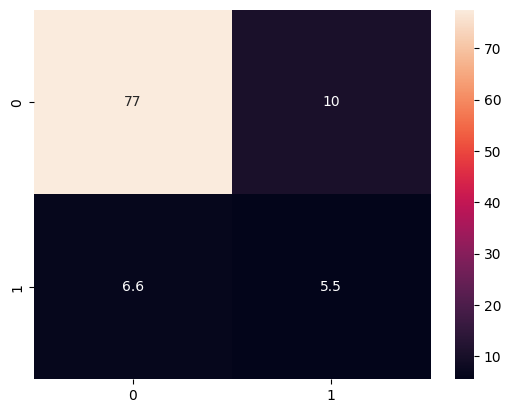

In [247]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred_best, y_true=y_test)/len(y_test)*100,
    annot=True
)

In [248]:
df_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf_bal.feature_importances_*100
})

# Ordenar el DataFrame por importancia de mayor a menor
df_importances = df_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
df_importances

,Feature,Importance
0,mean_importe,17.246732
1,PASIVO,11.462516
2,cross_sell_ahor,8.175575
3,tasa_ofertada,7.250772
4,max_con,6.541377
5,cliente digital,6.444128
6,sum_op_digital,5.884980
7,m_consultas,5.533665
8,MANTIENE_NOM,5.518408
9,ACTIVO,4.951620


In [ ]:
pickle.dump(model_rf, open("../Models/model_rf.pkl", "wb"))

#### **XGBoost**

In [136]:
modelo_xgb = XGBClassifier()

In [137]:
modelo_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [201]:
y_pred = modelo_xgb.predict(X_test_transformed)
y_probs = modelo_xgb.predict_proba(X_test_transformed)[:, 1]

In [202]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     47294
           1       0.42      0.30      0.35      6508

    accuracy                           0.86     53802
   macro avg       0.66      0.62      0.64     53802
weighted avg       0.85      0.86      0.85     53802

Accuracy: 0.8647076316865544


<Axes: >

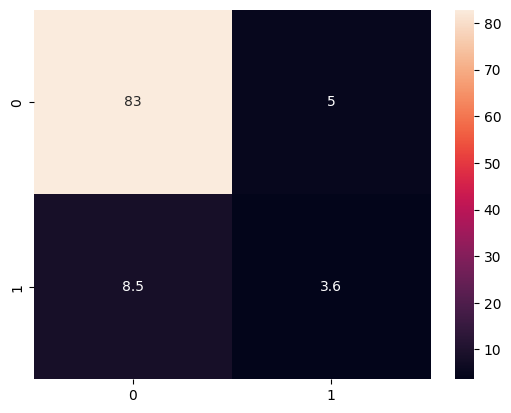

In [203]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred, y_true=y_test)/len(y_test)*100,
    annot=True
)

In [204]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

f1_list = []

# Calcular las métricas para cada umbral
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_list.append(f1)
    print(f"Threshold: {threshold:.2f} - f1: {f1:.2f}")

Threshold: 0.10 - f1: 0.35
Threshold: 0.20 - f1: 0.40
Threshold: 0.30 - f1: 0.42
Threshold: 0.40 - f1: 0.40
Threshold: 0.50 - f1: 0.35
Threshold: 0.60 - f1: 0.25
Threshold: 0.70 - f1: 0.11


In [205]:
# Encontrar el umbral que maximiza el recall
best_threshold = 0.3
# Usar el mejor umbral para hacer predicciones
y_pred_best = (y_probs >= best_threshold).astype(int)

In [206]:
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Accuracy:", accuracy_score(y_test, y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.88     47294
           1       0.33      0.58      0.42      6508

    accuracy                           0.81     53802
   macro avg       0.63      0.71      0.65     53802
weighted avg       0.86      0.81      0.83     53802

Accuracy: 0.8061967956581539


<Axes: >

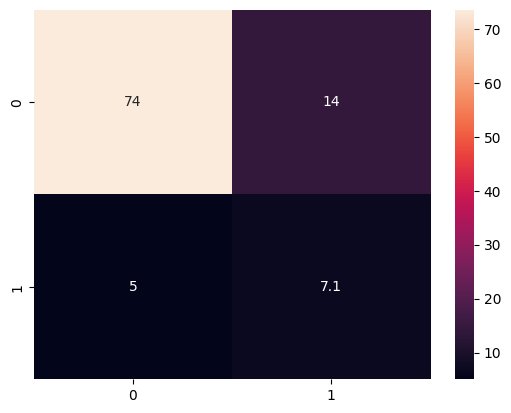

In [207]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred_best, y_true=y_test)/len(y_test)*100,
    annot=True
)

In [145]:
pickle.dump(modelo_xgb, open("../Models/model_xgb.pkl", "wb"))

#### **Regresión Logistica**

In [166]:
model_lr = LogisticRegression(random_state=13)

In [167]:
model_lr.fit(X_train_resampled, y_train_resampled)

c:\Users\jmart\Documents\Proyectos\Data_Science\Proyectos\prueba_bbva\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jmart\Documents\Proyectos\Data_Science\Proyectos\prueba_bbva\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=13)

In [208]:
y_pred = model_lr.predict(X_test_transformed)
y_probs = model_lr.predict_proba(X_test_transformed)[:, 1]

In [209]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.66      0.77     47294
           1       0.22      0.70      0.33      6508

    accuracy                           0.66     53802
   macro avg       0.58      0.68      0.55     53802
weighted avg       0.85      0.66      0.72     53802

Accuracy: 0.6625032526671871


<Axes: >

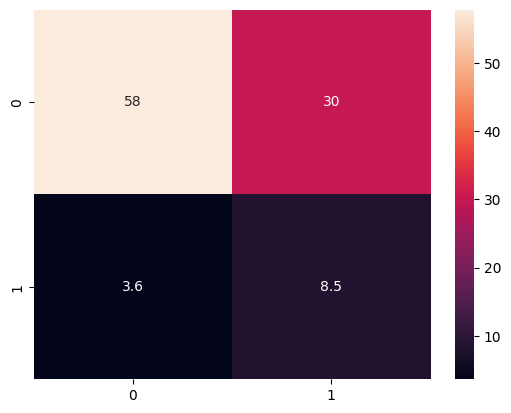

In [210]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred, y_true=y_test)/len(y_test)*100,
    annot=True
)

In [211]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

f1_list = []

# Calcular las métricas para cada umbral
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_list.append(f1)
    print(f"Threshold: {threshold:.2f} - f1: {f1:.2f}")

Threshold: 0.10 - f1: 0.22
Threshold: 0.20 - f1: 0.24
Threshold: 0.30 - f1: 0.27
Threshold: 0.40 - f1: 0.31
Threshold: 0.50 - f1: 0.33
Threshold: 0.60 - f1: 0.34
Threshold: 0.70 - f1: 0.30


In [215]:
# Encontrar el umbral que maximiza el recall
best_threshold = 0.6
# Usar el mejor umbral para hacer predicciones
y_pred_best = (y_probs >= best_threshold).astype(int)

In [216]:
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred_best))

print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     47294
           1       0.26      0.51      0.34      6508

    accuracy                           0.76     53802
   macro avg       0.59      0.66      0.60     53802
weighted avg       0.84      0.76      0.79     53802

Accuracy: 0.7645812423329987


<Axes: >

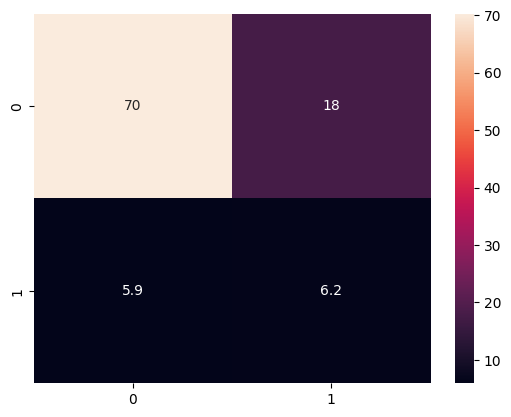

In [217]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred_best, y_true=y_test)/len(y_test)*100,
    annot=True
)

In [ ]:
pickle.dump(modelo_xgb, open("../Models/model_xgb.pkl", "wb"))